# Game Group Analysis
This notebook contains an analysis of various people within our board game group. They are listed below by username.

Using their stats/catalog on BGG we can see what games different people enjoy, and find potential matches for game preferences!

In [1]:
from utils import *
from tabulate import tabulate
import matplotlib.pyplot as plt
import numpy as np

users = ['mrjoeboo123',
        'Schwingzilla',
        'ngeagan',
        'Wellsroderick',
        'withouthavingseen']

Collecting the data is pretty simple since we can just grab the entire account data using the BGG API

In [2]:
collections = {}
for user in users:
    collections[user] = getCollection(user)

In [3]:
for user in users:
    print(f"{user} has {len(collections[user]):d} games listed on their account")

mrjoeboo123 has 112 games listed on their account
Schwingzilla has 271 games listed on their account
ngeagan has 582 games listed on their account
Wellsroderick has 260 games listed on their account
withouthavingseen has 138 games listed on their account


# User Game Breakdown
Games are listed mainly under 4 options 
- owned
- previously owned
- want (want in trade, buy, etc.)
- wishlist

In [4]:
headers = ['user','own','previosuly owned','want','wish','total']
status = []
for user in users:
    own = 0
    prev = 0
    want = 0
    wish = 0
    total = len(collections[user])
    for game in collections[user]:
        if game.own == 1: own += 1
        if game.prevowned == 1: prev += 1
        if game.want == 1: want += 1
        if game.wish != 0: wish += 1
    status.append([user, own, prev, want, wish, total])

print(tabulate(status, headers=headers, tablefmt="grid"))

+-------------------+-------+--------------------+--------+--------+---------+
| user              |   own |   previosuly owned |   want |   wish |   total |
+===================+=======+====================+========+========+=========+
| mrjoeboo123       |    84 |                  9 |      0 |     17 |     112 |
+-------------------+-------+--------------------+--------+--------+---------+
| Schwingzilla      |     0 |                  0 |      0 |      0 |     271 |
+-------------------+-------+--------------------+--------+--------+---------+
| ngeagan           |   174 |                106 |      0 |    152 |     582 |
+-------------------+-------+--------------------+--------+--------+---------+
| Wellsroderick     |   153 |                  2 |      0 |     91 |     260 |
+-------------------+-------+--------------------+--------+--------+---------+
| withouthavingseen |   115 |                  0 |      0 |      4 |     138 |
+-------------------+-------+--------------------+--

Unfortunetely not everyone has marked ratings for the various games they play. But we can take what data we do have and show that here

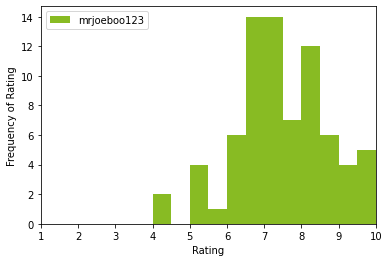

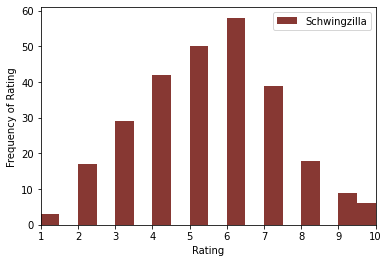

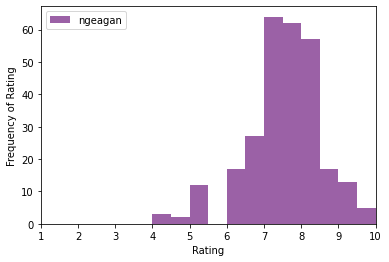

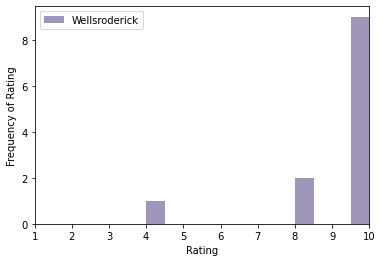

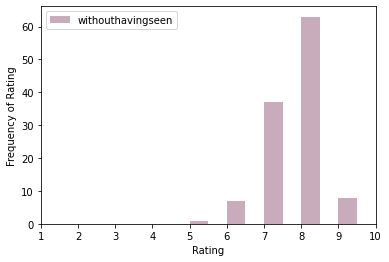

In [5]:
all_ratings = []
colors = []
binwidth = 0.5
bins=np.arange(1, 10 + binwidth, binwidth)
for user in users:
    ratings = []
    color = generate_random_hex_color()
    for game in collections[user]:
        if game.myrating != None:
            ratings.append(game.myrating)

    all_ratings.append(ratings)
    colors.append(color)
    plt.hist(ratings, bins=bins, label=user, color=color)
    plt.legend()
    plt.xlabel('Rating')
    plt.ylabel('Frequency of Rating')
    plt.xlim(1,10)
    plt.savefig('./docs/source/plots/'+user+'.png')
    plt.show()


# Finding Common Interests
In this section, we will take the collections and find where people overlap (if at all)

In [22]:
minRating = 8
matches = {}
games = {}
for i in range(len(users)-1):
    for j in range(i+1, len(users)):
        for g1 in collections[users[i]]:
            if g1.myrating == None: continue
            for g2 in collections[users[j]]:
                if g2.myrating == None: continue
                if g1.objectid == g2.objectid and g1.myrating>minRating and g2.myrating>minRating:
                    try:
                        if users[j] not in matches[g1.name]:
                            matches[g1.name].append(users[j])
                    except:
                        matches[g1.name] = [users[i], users[j]]
                        games[g1.name] = g1

print(f"{len(matches.keys()):d} MATCHES FOUND")

10 MATCHES FOUND


Using this we can see what games people have both rated above the `minRating` in the previous code block (right now a min rating of 8.0)

In [23]:
for k in matches.keys():
    out = f'<img src="{games[k].thumbnail}" />:\t'
    for user in matches[k]:
        out += f"{user} "
    out += '   '
    print(out)

<img src="https://cf.geekdo-images.com/SoU8p28Sk1s8MSvoM4N8pQ__thumb/img/4KuHNTWSMPf8vTNDKSRMMI3oOv8=/fit-in/200x150/filters:strip_icc()/pic6293412.jpg" />:	mrjoeboo123 ngeagan    
<img src="https://cf.geekdo-images.com/x3zxjr-Vw5iU4yDPg70Jgw__thumb/img/o18rjEemoWaVru9Y2TyPwuIaRfE=/fit-in/200x150/filters:strip_icc()/pic3490053.jpg" />:	mrjoeboo123 ngeagan    
<img src="https://cf.geekdo-images.com/OrHS8_a1CqSGiXeTfCk0Wg__thumb/img/ZBTT0qZcD5HMFlhFN7PLMe6zXvg=/fit-in/200x150/filters:strip_icc()/pic3209553.jpg" />:	mrjoeboo123 ngeagan    
<img src="https://cf.geekdo-images.com/hc2NDafu5c24iLJh_IZmyg__thumb/img/8TA1Gn7jERN4yhtXD-xBCGk-QfM=/fit-in/200x150/filters:strip_icc()/pic4885780.png" />:	mrjoeboo123 Wellsroderick    
<img src="https://cf.geekdo-images.com/DPjV1iI0ygo5Bl3XLNRiIg__thumb/img/O2WnqJew5gNjQqPUH3gqmTBc1pQ=/fit-in/200x150/filters:strip_icc()/pic4449526.jpg" />:	mrjoeboo123 Wellsroderick    
<img src="https://cf.geekdo-images.com/k7lG683LBZdvFyS-FH-MpA__thumb/img/6KTtiknxxG

## advanced common interests

In [20]:
print("Games both players own")
matches = {}
games = {}
for i in range(len(users)-1):
    for j in range(i+1, len(users)):
        for g1 in collections[users[i]]:
            for g2 in collections[users[j]]:
                if g1.objectid == g2.objectid and g1.own==1 and g2.own==1:
                    try:
                        if users[j] not in matches[g1.name]:
                            matches[g1.name].append(users[j])
                    except:
                        matches[g1.name] = [users[i], users[j]]
                        games[g1.name] = g1

for k in matches.keys():
    out = f'<img src="{games[k].thumbnail}" />:\t'
    for user in matches[k]:
        out += f"{user} "
    out += '   '
    print(out)

Games both players own
<img src="https://cf.geekdo-images.com/SoU8p28Sk1s8MSvoM4N8pQ__thumb/img/4KuHNTWSMPf8vTNDKSRMMI3oOv8=/fit-in/200x150/filters:strip_icc()/pic6293412.jpg" />:	mrjoeboo123 ngeagan Wellsroderick    
<img src="https://cf.geekdo-images.com/x3zxjr-Vw5iU4yDPg70Jgw__thumb/img/o18rjEemoWaVru9Y2TyPwuIaRfE=/fit-in/200x150/filters:strip_icc()/pic3490053.jpg" />:	mrjoeboo123 ngeagan withouthavingseen    
<img src="https://cf.geekdo-images.com/nMitZr9Lu4Ux7LLqBy7Z8A__thumb/img/mLHWOFfdxrWljImkFZ2ulIhHt7A=/fit-in/200x150/filters:strip_icc()/pic6875169.png" />:	mrjoeboo123 ngeagan    
<img src="https://cf.geekdo-images.com/Z6MMX39UEAZT3-f-DlnHsA__thumb/img/5Bf6oWIJTdHYpLAodTPqbDxh_Bc=/fit-in/200x150/filters:strip_icc()/pic8114705.jpg" />:	mrjoeboo123 ngeagan    
<img src="https://cf.geekdo-images.com/6QE8mnPFmauoj2THsyUYPA__thumb/img/m63hnvHi6jqlva52FGaWbEqzjys=/fit-in/200x150/filters:strip_icc()/pic4739757.jpg" />:	mrjoeboo123 ngeagan    
<img src="https://cf.geekdo-images.com/O